<a href="https://colab.research.google.com/github/andreaafs100766/Sprint-01/blob/master/mvp_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1.0"></a>
#### <b><span style='color:#B21010'>|</span> MVP - 📉 Netflix TV Shows e Cinemas🍟

*OBS: Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/input/netflix-tv-shows-and-movies/credits.csv e https://www.kaggle.com/input/netflix-tv-shows-and-movies/titles.csv*


In [ ]:
!pip install country_converter
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <b>1 <span style='color:#B21010'>||</span> 🔎 Importando Bibliotecas</b>

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import country_converter as counco

# nltk
import nltk
import ast
import random

from matplotlib import cm
from plotly.subplots import make_subplots

# visualization
from wordcloud import WordCloud
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
from plotly.offline import init_notebook_mode, iplot



<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> 🔎 Carregando e explicando DataSet</b>

<a id="2.1"></a>
 ####  <b>2.1 <span style='color:#B21010'>|</span> Carregando DataSet

In [ ]:
# Informa a URL de importação do dataset
def read_dataset():

    credits=pd.read_csv('https://raw.githubusercontent.com/andreaafs100766/Sprint-01/master/credits.csv')
    print('"credits.csv" imported successfully!')

    titles=pd.read_csv('https://raw.githubusercontent.com/andreaafs100766/Sprint-01/master/titles.csv')
    print('"titles.csv" imported successfully!')

    return credits, titles

In [ ]:
credits, titles=read_dataset()

"credits.csv" imported successfully!
"titles.csv" imported successfully!


<a id="2.2"></a>
#### <b>2.2 <span style='color:#B21010'>|</span> Explicando o DataSet

<div style="border-radius:10px;
            border :#000000 solid;
            padding: 15px;
            background-color:#fefbd8;
            font-size:110%;
            text-align: left">

>             
Este conjunto de dados foi criado para listar todos os programas disponíveis no streaming da Netflix para analisar os dados e verificar fatos interessantes. 

>Esses dados foram adquiridos em julho de 2022 contendo dados disponíveis nos Estados Unidos.

>    
Este conjunto de dados tem dois arquivos contendo os títulos (titles.csv) e o elenco (credits.csv) para o título.

> 
📌 Este conjunto de dados contém +5k títulos exclusivos no Netflix com 15 colunas contendo suas informações, incluindo:
> > 
**id**:  ID do título.    
**title**: Nome do título.    
**show_type**: TV show or cinema.    
**description**: Uma breve descrição.    
**release_year**: Ano da release.    
**age_certification**: Certificação de idade .    
**runtime**: A duração do episódio (SHOW) ou filme.    
**genres**: Lista de gernero.    
**production_countries**: Uma lista de países que produziram o título.    
**seasons**: Número de temporadas se for um SHOW.    
**imdb_id**: ID do título no IMDB.    
**imdb_score**: Score no IMDB.    
**imdb_votes**: Votos no IMDB.    
**tmdb_popularity**: Popularidade no TMDB.    
**tmdb_score**: Score no TMDB.
    
>📌 E mais de +77k créditos de atores e diretores em títulos da Netflix com 5 colunas contendo suas informações, incluindo:
>>
**person_ID**: O ID da pessoa.    
**id**  : ID do título.    
**nome**: O nome do ator ou diretor.    
**role**: ACTOR or DIRECTOR.




<a id="3 "></a>
## <b>3  <span style='color:#B21010'>|</span> 🔎 Estatísticas Descritivas</b>

<a id="3.1"></a>
#### <b>3.1 <span style='color:#B21010'>|</span> Informações Basica sobre DataSet

In [ ]:
# Mostra as dimensões do dataset credits
credits.shape

(77801, 5)

In [ ]:
# Mostra as dimensões do dataset titles
titles.shape


(5850, 15)

In [ ]:
# Mostra as informações do dataset credits
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [ ]:
# Mostra as informações do dataset titles
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# Mostra as 10 primeiras linhas do dataset credits
credits.head(10)

person_id       id             name                      character   role
0       3748  tm84618   Robert De Niro                  Travis Bickle  ACTOR
1      14658  tm84618     Jodie Foster                  Iris Steensma  ACTOR
2       7064  tm84618    Albert Brooks                            Tom  ACTOR
3       3739  tm84618    Harvey Keitel        Matthew 'Sport' Higgins  ACTOR
4      48933  tm84618  Cybill Shepherd                          Betsy  ACTOR
5      32267  tm84618      Peter Boyle                         Wizard  ACTOR
6     519612  tm84618   Leonard Harris      Senator Charles Palantine  ACTOR
7      29068  tm84618   Diahnne Abbott                Concession Girl  ACTOR
8     519613  tm84618      Gino Ardito             Policeman at Rally  ACTOR
9       3308  tm84618  Martin Scorsese  Passenger Watching Silhouette  ACTOR

In [ ]:
# Mostra as 10 últimas linhas do dataset credits
credits.tail(10)

person_id         id                name               character  \
77791     164248  tm1059008      Jessica Cediel         Liliana Navarro   
77792    1402344  tm1059008  Javier Gardeazábal  Agustín "Peluca" Ortíz   
77793     369222  tm1059008       Carla Giraldo          Valery Reinoso   
77794     369221  tm1059008   Ana María Sánchez                 Lourdes   
77795     368473  tm1059008        Aída Morales                 Maritza   
77796     736339  tm1059008    Adelaida Buscato               María Paz   
77797     399499  tm1059008  Luz Stella Luengas            Karen Bayona   
77798     373198  tm1059008         Inés Prieto                   Fanny   
77799     378132  tm1059008        Isabel Gaona                  Cacica   
77800    1950416  tm1059008      Julian Gaviria                     NaN   

           role  
77791     ACTOR  
77792     ACTOR  
77793     ACTOR  
77794     ACTOR  
77795     ACTOR  
77796     ACTOR  
77797     ACTOR  
77798     ACTOR  
77799     ACTOR  
77800  DIRECTOR

In [ ]:
# Mostra as 10 primeiras linhas do dataset titles
titles.head(10)

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   
5   ts22164         Monty Python's Flying Circus   SHOW   
6   tm70993                        Life of Brian  MOVIE   
7   tm14873                          Dirty Harry  MOVIE   
8  tm119281                     Bonnie and Clyde  MOVIE   
9   tm98978                      The Blue Lagoon  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   
5  A British sketch comedy series with the shows ...          1969   
6  Brian Cohen is an average young Jewish man, bu...          1979   
7  When a madman dubbed 'Scorpio' terrorizes San ...          1971   
8  In the 1930s, bored waitress Bonnie Parker fal...          1967   
9  Two small children and a ship's cook survive a...          1980   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   
5             TV-14       30                       ['comedy', 'european']   
6                 R       94                                   ['comedy']   
7                 R      102              ['thriller', 'action', 'crime']   
8                 R      110                 ['crime', 'drama', 'action']   
9                 R      104               ['romance', 'action', 'drama']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   
5               ['GB']      4.0  tt0063929         8.8     73424.0   
6               ['GB']      NaN  tt0079470         8.0    395024.0   
7               ['US']      NaN  tt0066999         7.7    155051.0   
8               ['US']      NaN  tt0061418         7.7    112048.0   
9               ['US']      NaN  tt0080453         5.8     69844.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600  
5           17.617       8.306  
6           17.770       7.800  
7           12.817       7.500  
8           15.687       7.500  
9           50.324       6.156

In [ ]:
# Mostra as 10 últimas linhas do dataset titles
titles.tail(10)

id                                      title   type  \
5840  tm1216735                            Sun of the Soil  MOVIE   
5841   tm985215                       Princess 'Daya'Reese  MOVIE   
5842  tm1066324          Super Monsters: Once Upon a Rhyme  MOVIE   
5843  tm1097142                                   My Bride  MOVIE   
5844  tm1074617              Bling Empire - The Afterparty  MOVIE   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
5840  In 14th-century Mali, an ambitious young royal...          2022   
5841  Reese is a con artist from Manila who dreams o...          2021   
5842  The Super Monsters rethink exemplary fantasies...          2021   
5843  The story follows a young man and woman who go...          2021   
5844  The stars of "Bling Empire" discuss the show's...          2021   
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                             genres  \
5840               NaN       26                                 []   
5841               NaN      115              ['comedy', 'romance']   
5842               NaN       25            ['animation', 'family']   
5843               NaN       93     ['romance', 'comedy', 'drama']   
5844               NaN       35                                 []   
5845               NaN      100               ['romance', 'drama']   
5846               NaN      134                          ['drama']   
5847               NaN       90                         ['comedy']   
5848             PG-13       37                                 []   
5849               NaN        7  ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
5840                   []      NaN         NaN         NaN         NaN   
5841               ['PH']      NaN  tt13399802         7.1        50.0   
5842                   []      NaN  tt14586752         5.6        38.0   
5843               ['EG']      NaN  tt14216488         5.0       327.0   
5844               ['US']      NaN         NaN         NaN         NaN   
5845               ['NG']      NaN  tt13857480         6.8        45.0   
5846                   []      NaN  tt11803618         7.7       348.0   
5847               ['CO']      NaN  tt14585902         3.8        68.0   
5848               ['US']      NaN         NaN         NaN         NaN   
5849                   []      1.0  tt13711094         7.8        18.0   

      tmdb_popularity  tmdb_score  
5840            1.179         7.0  
5841            1.383         NaN  
5842           53.762         6.3  
5843            2.545         5.3  
5844              NaN         NaN  
5845            1.466         NaN  
5846              NaN         NaN  
5847           26.005         6.3  
5848            1.296        10.0  
5849            2.289        10.0

<a id="4"></a>
## <b>4 <span style='color:#B21010'>|| </span> 🔎 Algumas Informações Exploratorias sobre DataSet </b>

<a id="4.1"></a>
#### <b>4.1 <span style='color:#B21010'>|</span> Estatísticas descritivas do DataSet


In [ ]:
# Faz um resumo estatístico do dataset credits (média, desvio padrão, mínimo, máximo e os quartis)
credits.describe().T.style.set_properties(**{"background-color": "#fef2f2", "font-size" : "17px",
                                        "color": "#3c0505", "border-radius" : "1px", "border": "1.5px solid black"})

In [ ]:
# Faz um resumo estatístico do dataset titles (média, desvio padrão, mínimo, máximo e os quartis) 
titles.describe().T.style.set_properties(**{"background-color": "#fef2f2", "font-size" : "17px",
                                        "color": "#3c0505", "border-radius" : "1px", "border": "1.5px solid black"})

<a id="4.2"></a>
#### <b>4.2 <span style='color:#B21010'>|</span> Outras informações úteis sobre o conjunto de dados

In [ ]:
# Verifica a distribuição das classes credits por nome 
credits.groupby('name').size()

name
 Michael Hayden        1
'Jeeva' Ravi           1
'Weird Al' Yankovic    2
21 Savage              1
2Mex                   1
                      ..
장성                     2
정지환                    1
주둥닝                    1
지뢰                     1
탕빈                     1
Length: 54314, dtype: int64

In [ ]:
# Verifica a distribuição das classes credits por personagem
credits.groupby('character').size()

character
"Barton"               1
"Big Tony" Hamilton    1
"Birdy"                1
"Buła"                 1
"Czuły Roman"          1
                      ..
青雄                     1
볼트                     1
새미                     1
월주(아역)                 1
츄우                     1
Length: 47274, dtype: int64

In [ ]:
# Verifica a distribuição das classes credits por identificador id
credits.groupby('person_id').size()

person_id
7          3
8          3
11         3
16         1
18         2
          ..
2462756    1
2462758    1
2462782    1
2462800    1
2462818    1
Length: 54589, dtype: int64

In [ ]:
# Verifica a distribuição das classes titles Score
titles.groupby('tmdb_score').size()

tmdb_score
0.5      1
1.0     10
1.5      1
2.0     15
2.2      1
        ..
9.5      7
9.6      1
9.7      4
9.8      4
10.0    75
Length: 394, dtype: int64

In [ ]:
titles.groupby('genres').size().sum()

5850

<a id="4.3"></a>
#### <b>4.3 <span style='color:#B21010'>|</span> Visualizações Unimodais

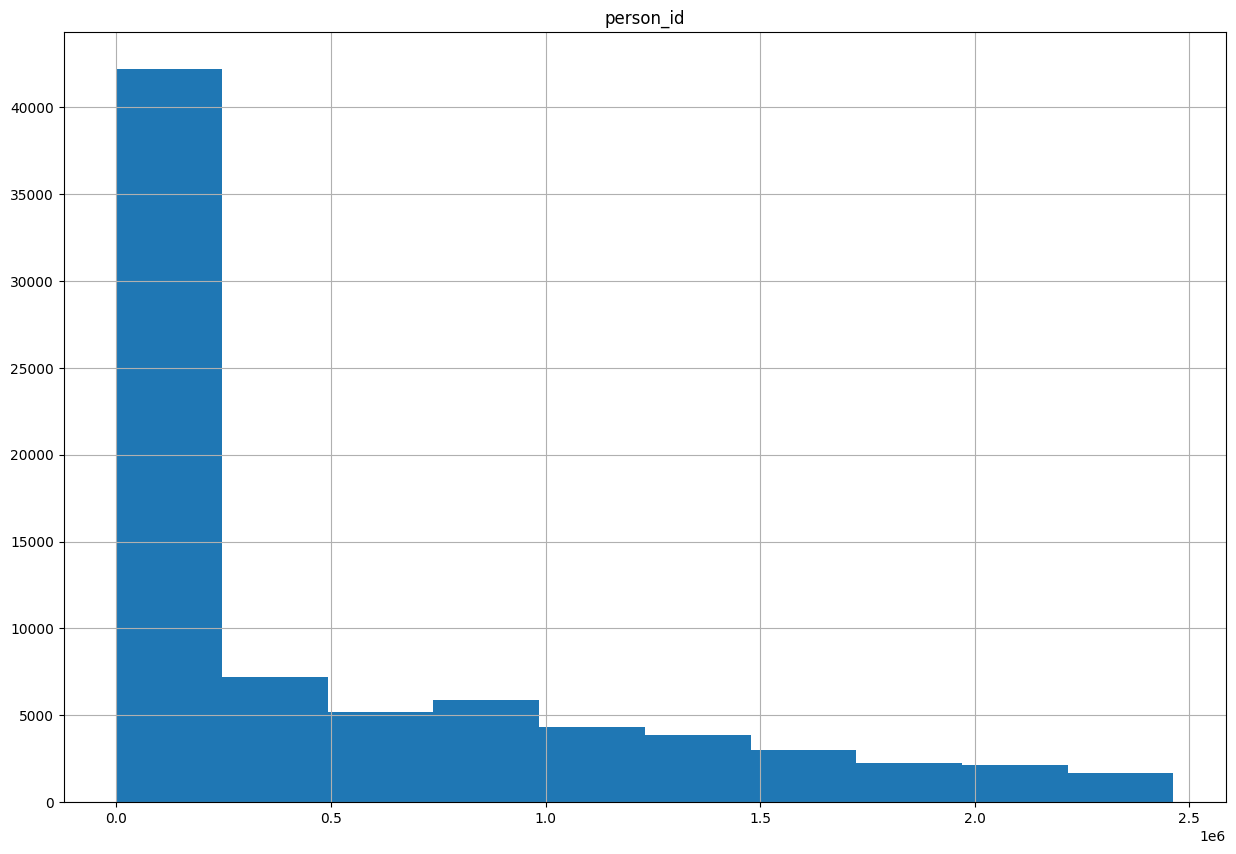

In [ ]:
# Histograma credits
credits.hist(figsize = (15,10))
plt.show()

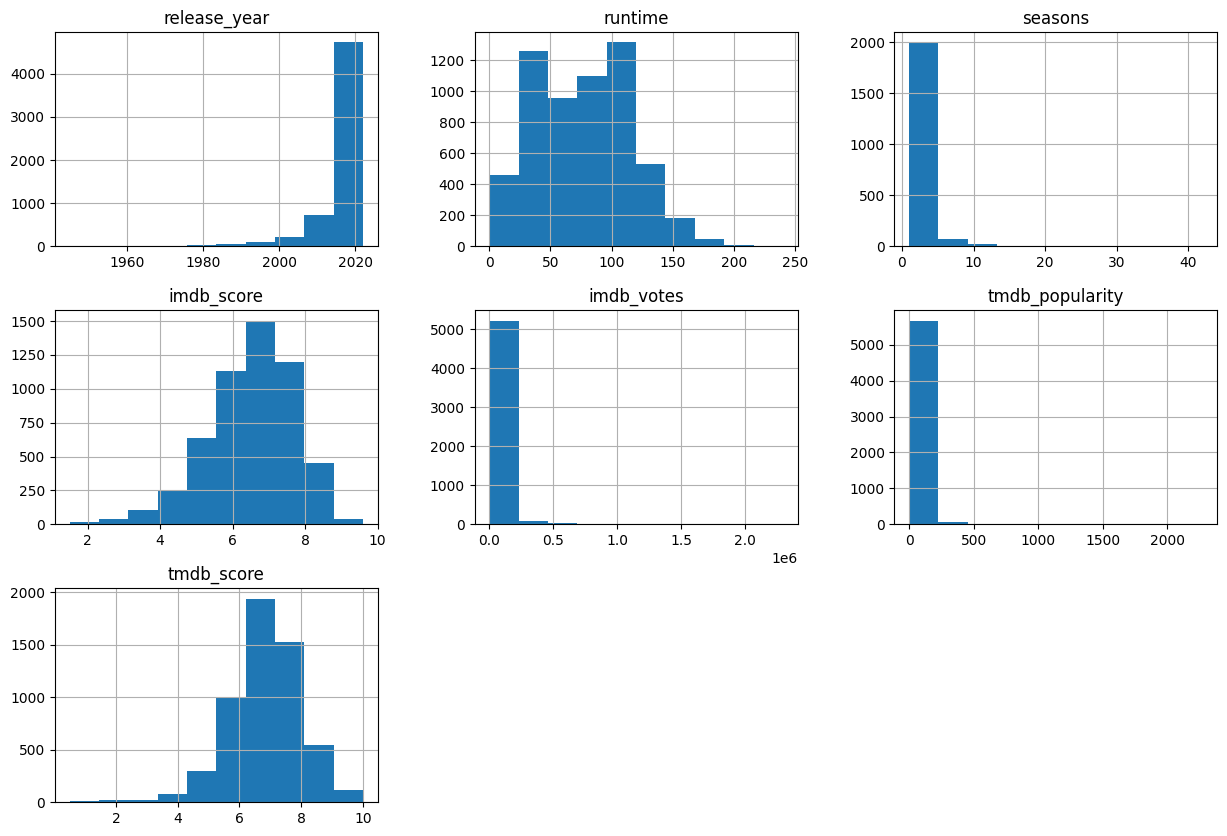

In [ ]:
# Histograma titles
titles.hist(figsize = (15,10))
plt.show()

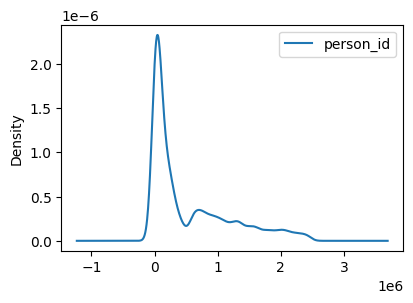

In [ ]:
# Density Plot credits
credits.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

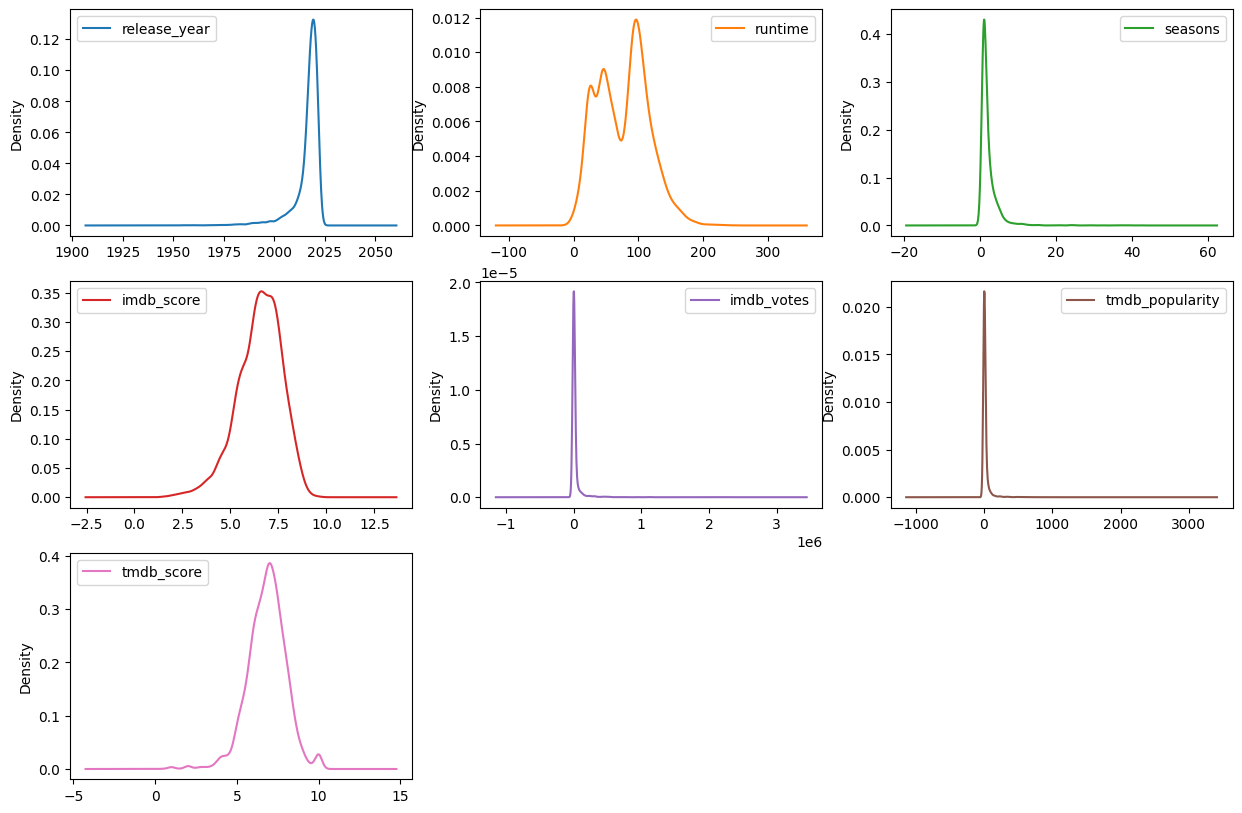

In [ ]:
# Density Plot titles
titles.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

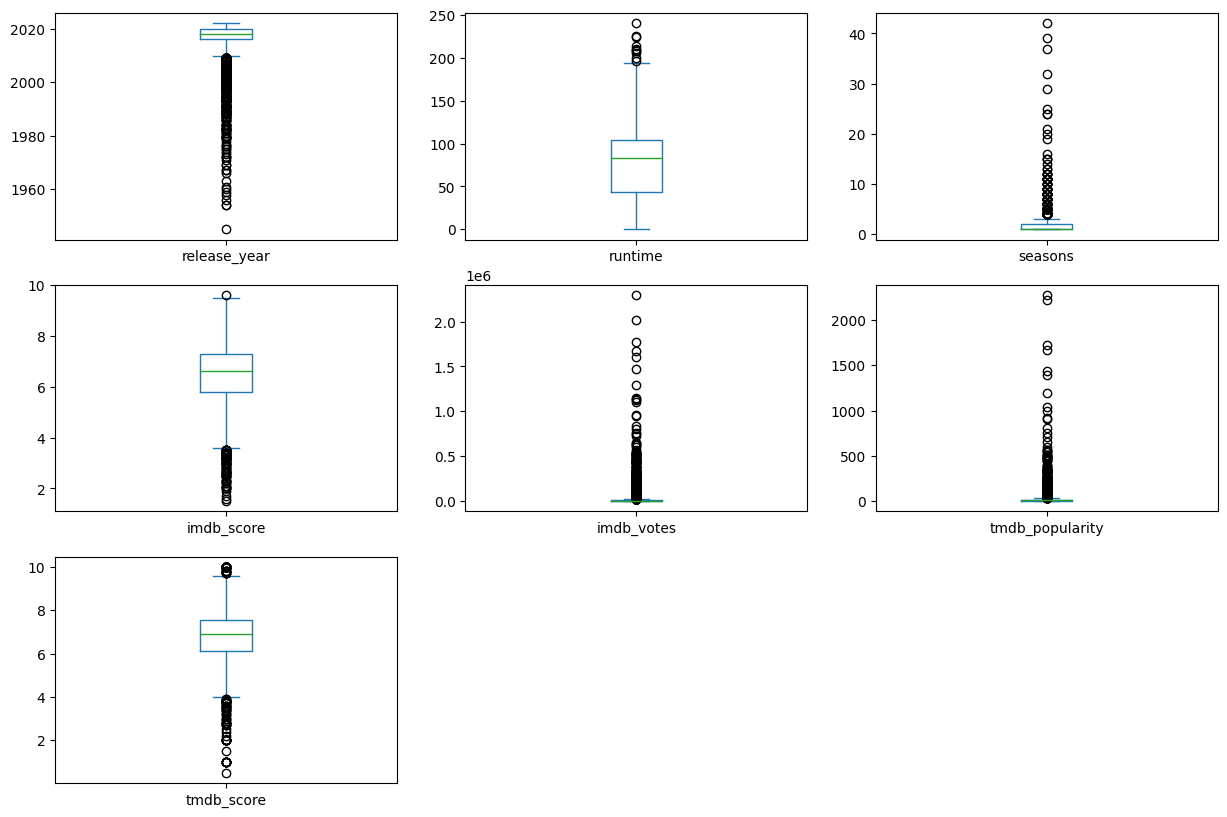

In [ ]:
# Boxplot titles
titles.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Descompactando e reparando os valores das colunas "production_countries" e "genre" que atualmente são arrays

In [ ]:
def repair_array_bound_categories(arr):
    arr=ast.literal_eval(arr)
    
    if len(arr)==0:
        return np.nan
    
    elif len(arr)==1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [ ]:
titles["production_countries"]=titles["production_countries"].apply(repair_array_bound_categories)

titles["genres"]=titles["genres"].apply(repair_array_bound_categories)

In [ ]:
titles.head(5)

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime         genres production_countries  seasons  \
0             TV-MA       51  documentation                   US      1.0   
1                 R      114          crime                   US      NaN   
2                 R      109         action                   US      NaN   
3                PG       91         action                   GB      NaN   
4               NaN      150            war                   GB      NaN   

     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0        NaN         NaN         NaN            0.600         NaN  
1  tt0075314         8.2    808582.0           40.965       8.179  
2  tt0068473         7.7    107673.0           10.010       7.300  
3  tt0071853         8.2    534486.0           15.461       7.811  
4  tt0061578         7.7     72662.0           20.398       7.600

<a id="8"></a>
#### <b> <span style='color:#B21010'>|</span> Agrupando por Pais Produção e Score

In [ ]:
df_grouped = titles.groupby(by="production_countries")["imdb_score"].sum()

print (df_grouped)

production_countries
AE     82.7
AF      7.7
AR    357.0
AT     53.6
AU    480.7
      ...  
UY     12.6
VN     10.5
XX    128.6
ZA    206.3
ZW      6.0
Name: imdb_score, Length: 90, dtype: float64


<a id="8"></a>
#### <b> <span style='color:#B21010'>|</span> Agrupando por Generos e Score

In [ ]:
df_grouped = titles.groupby(by="genres")["imdb_score"].sum()

print (df_grouped)

genres
action           2030.7
animation        1328.6
comedy           6723.8
crime            1954.3
documentation    3799.8
drama            7494.4
european          847.3
family           1175.6
fantasy           862.3
history           543.3
horror            642.0
music             607.5
reality           896.4
romance          2065.6
scifi             907.4
sport             426.0
thriller         2184.4
war               295.8
western           121.6
Name: imdb_score, dtype: float64


<h2 style="color:#034914 ;font-size: 1em "><b> 🔎 Análise das Colunas: Tipo, Idade Cedrtificada e Gênero</b>

In [ ]:
cat_cols=["type","age_certification","genres"]

In [ ]:
cat_cols

['type', 'age_certification', 'genres']

In [ ]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=True,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=True,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [ ]:
for col in cat_cols:
    cat_summary_with_graph(titles,col)

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Top 10 países que costumam contribuir com a Netflix

<a id="8"></a>
#### <b> <span style='color:#B21010'>|</span> Transformando ocampo não informado alterando o conteudo do campo [] para [N/A]

In [ ]:
#data  =  titles
#df = pd.DataFrame(titles,columns=['id','title','show_type','description','release_year','age_certification','runtime','genres','production_countries','seasons','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
df = titles
df['production_countries']= df['production_countries'].replace(['[]'],['[N/A]'])
#df = df['production_countries'].replace('[]','[N/A]')

In [ ]:
#titles = titles['production_countries'].replace('[]','[N/A]')
df.head(10)

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   
5   ts22164         Monty Python's Flying Circus   SHOW   
6   tm70993                        Life of Brian  MOVIE   
7   tm14873                          Dirty Harry  MOVIE   
8  tm119281                     Bonnie and Clyde  MOVIE   
9   tm98978                      The Blue Lagoon  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   
5  A British sketch comedy series with the shows ...          1969   
6  Brian Cohen is an average young Jewish man, bu...          1979   
7  When a madman dubbed 'Scorpio' terrorizes San ...          1971   
8  In the 1930s, bored waitress Bonnie Parker fal...          1967   
9  Two small children and a ship's cook survive a...          1980   

  age_certification  runtime         genres production_countries  seasons  \
0             TV-MA       51  documentation                   US      1.0   
1                 R      114          crime                   US      NaN   
2                 R      109         action                   US      NaN   
3                PG       91         action                   GB      NaN   
4               NaN      150            war                   GB      NaN   
5             TV-14       30         comedy                   GB      4.0   
6                 R       94         comedy                   GB      NaN   
7                 R      102          crime                   US      NaN   
8                 R      110          drama                   US      NaN   
9                 R      104          drama                   US      NaN   

     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0        NaN         NaN         NaN            0.600         NaN  
1  tt0075314         8.2    808582.0           40.965       8.179  
2  tt0068473         7.7    107673.0           10.010       7.300  
3  tt0071853         8.2    534486.0           15.461       7.811  
4  tt0061578         7.7     72662.0           20.398       7.600  
5  tt0063929         8.8     73424.0           17.617       8.306  
6  tt0079470         8.0    395024.0           17.770       7.800  
7  tt0066999         7.7    155051.0           12.817       7.500  
8  tt0061418         7.7    112048.0           15.687       7.500  
9  tt0080453         5.8     69844.0           50.324       6.156

In [ ]:
df.sample(50)

id                                              title   type  \
3855   tm973536                       Kevin Hart: Zero F**ks Given  MOVIE   
2980   tm368284                     Arango y Sanint: Ríase el show  MOVIE   
4530   tm927926                                         Dad Wanted  MOVIE   
4329   tm843143                                            Whipped  MOVIE   
691     ts81858                                              Larva   SHOW   
5239   tm894254                                      Penguin Bloom  MOVIE   
3672   ts105645                                  Historical Roasts   SHOW   
2305   tm365122                                              Benji  MOVIE   
1112   tm179248                                             Settai  MOVIE   
3152   tm983787                                                Ava  MOVIE   
3580   ts226602                          How to Fix a Drug Scandal   SHOW   
2818    ts84341                          What She Put on the Table   SHOW   
1051   tm154729                                       Dedh Ishqiya  MOVIE   
2810   tm344562                                             Listen  MOVIE   
1724    ts56768                                        Money Heist   SHOW   
3922   tm918043                                     Raat Akeli Hai  MOVIE   
2086    ts85659                           3Below: Tales of Arcadia   SHOW   
5242   ts346500                                        Wild Babies   SHOW   
5551  tm1030283                               Why Did You Kill Me?  MOVIE   
4633   tm834608                                              Alelí  MOVIE   
3114   tm919961                                  Pieces of a Woman  MOVIE   
5428  tm1125844                                    The Whole Truth  MOVIE   
1761   tm300280           Rumble: The Indians Who Rocked the World  MOVIE   
5836   tm959213                                          My Amanda  MOVIE   
258    tm154187                                    Sherlock Holmes  MOVIE   
3391   tm490222                                           Uncorked  MOVIE   
4733   ts255888                                         First Kill   SHOW   
2815   tm361588  Mission Kathmandu: The Adventures of Nelly & S...  MOVIE   
3543   ts223238                                       My Holo Love   SHOW   
4427   ts213611                        Bangkok Love Stories: Plead   SHOW   
1105   tm138280                                      Sigaram Thodu  MOVIE   
3077   ts100116                                         Blown Away   SHOW   
97     tm122434                                       Forrest Gump  MOVIE   
21     tm100027                                Alibaba Aur 40 Chor  MOVIE   
3727   ts254982                                       Nadiya Bakes   SHOW   
3105   tm414584                                  Rambo: Last Blood  MOVIE   
1860   tm317566                                            Creep 2  MOVIE   
2090   tm448122              Taylor Swift: Reputation Stadium Tour  MOVIE   
1307    ts36630                                           Dinotrux   SHOW   
4016   tm460815                                        Luka Chuppi  MOVIE   
1124    ts21867                                     Schitt's Creek   SHOW   
5816  tm1037800                              Soy Rada: Serendipity  MOVIE   
5648  tm1073555                        Thimmarusu: Assignment Vali  MOVIE   
5717  tm1045603                    The House of Flowers: The Movie  MOVIE   
5488   ts301964  Revelations: The Masters of the Universe: Reve...   SHOW   
2350   tm363329                          Christmas Wedding Planner  MOVIE   
2109    ts81734                                             Chosen   SHOW   
3562   ts226588            100 Humans: Life's Questions. Answered.   SHOW   
5315   ts296081          The Parisian Agency: Exclusive Properties   SHOW   
1558   tm227523                                              Fifty  MOVIE   

                                            description  release_year  \
3855  Kevin 

<a id="9"></a>
#### <b> <span style='color:#B21010'>|</span> Mostra 50 colunas aleatórias

In [ ]:
titles.sample(50)

id                                          title   type  \
5343  tm1003725                         A Castle for Christmas  MOVIE   
2074    ts75157               The Magic School Bus Rides Again   SHOW   
4433   tm830151                 One Day We'll Talk About Today  MOVIE   
3480    ts87008                                Turn Up Charlie   SHOW   
5565   tm996040                       Forever Out of My League  MOVIE   
867    tm151764                                       Barefoot  MOVIE   
3171   tm886464                                The Wrong Missy  MOVIE   
2513    ts81036                              The Who Was? Show   SHOW   
1705   tm234735                                       Time Out  MOVIE   
2156   tm290831                                 Fun Mom Dinner  MOVIE   
2322    ts78789                                       Re: Mind   SHOW   
3364   tm952590                                What Lies Below  MOVIE   
4775   ts284297                       All American: Homecoming   SHOW   
5730  tm1036797                             Sardar Ka Grandson  MOVIE   
852    tm183523                                         Oldboy  MOVIE   
2068    ts85175                              Girl from Nowhere   SHOW   
4644   tm826983                           The Girl and the Gun  MOVIE   
5522   ts287853                                        Coyotes   SHOW   
5336  tm1130264        Nicole Byer: BBW (Big Beautiful Weirdo)  MOVIE   
891    tm171228                   Metallica: Through the Never  MOVIE   
4523   tm949905                                     Asura Guru  MOVIE   
48      ts25028                               Wheel of Fortune   SHOW   
2121   tm359103                                   River's Edge  MOVIE   
1591   tm263743                                       The Doll  MOVIE   
4750   tm404856                                     Red Notice  MOVIE   
3280   tm434553                                Cut Throat City  MOVIE   
1978    ts83906                    Car Masters: Rust to Riches   SHOW   
113     tm56574                                You've Got Mail  MOVIE   
957    tm187390                                     The Square  MOVIE   
4654   tm983849     Vir Das: Outside in - The Lockdown Special  MOVIE   
2953   tm370781               Natalia Valdebenito: El especial  MOVIE   
438     tm25842                            A Lion in the House  MOVIE   
3991   tm837690                                 Eeb Allay Ooo!  MOVIE   
4014   tm918853                               All Together Now  MOVIE   
4243   tm428506                      The Man Who Feels No Pain  MOVIE   
3943   tm847678                                   Romance Doll  MOVIE   
5613  tm1063034  The Wonderful: Stories from the Space Station  MOVIE   
5424  tm1001108                  Biggie: I Got a Story to Tell  MOVIE   
3322   ts306090                                GREAT PRETENDER   SHOW   
3252   ts105047                                    To the Lake   SHOW   
4158   tm468200                                          Uyare  MOVIE   
1763    ts58155                                    Alias Grace   SHOW   
1871    ts57424                                     The Forest   SHOW   
1812    ts76458                                       Deadwind   SHOW   
74     tm157853                    In Defense of a Married Man  MOVIE   
4027   ts223690              Yanxi Palace: Princess Adventures   SHOW   
2997   ts229123                                 Little Singham   SHOW   
1899    ts81344                                      Explained   SHOW   
874    tm161525                              The Green Inferno  MOVIE   
1454    ts57705                                      The Paper   SHOW   

                                            description  release_year  \
5343  To escape a scandal, a bestselling author jour...          2021   
2074  Ms. Frizzle's sister takes her class on a slew...          2017   
4433  Three siblings live in happy-looking families,...          2020 

In [ ]:
country_count = df['production_countries'].value_counts().head(10)
fig = px.bar(y=country_count.values, 
             x=country_count.index, 
             color = country_count.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=country_count.values,
             title= 'Top 10 países que costumam contribuir com a Netflix',
             template= 'seaborn')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Count",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Distribuição da produção cinematográfica por países

In [ ]:
converted_country=counco.convert(names=df["production_countries"], to="ISO3")
df["production_countries"]=converted_country

In [ ]:
country=titles["production_countries"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribuição de produção de filmes por País')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Data de lançamento das séries e filmes da Netflix (1940-2021)

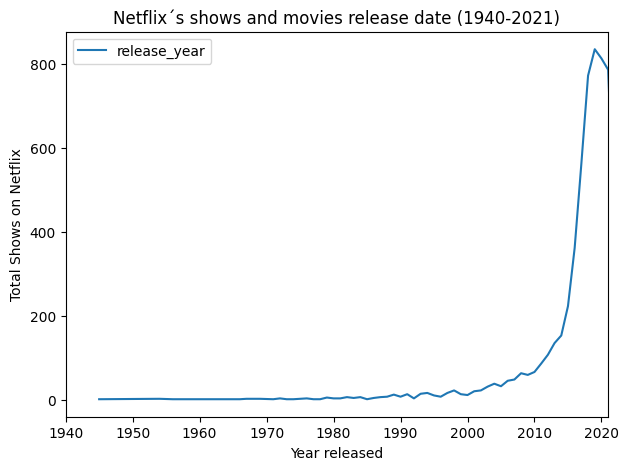

In [ ]:
release_year_count=titles['release_year'].value_counts()
release_year_count=pd.DataFrame(release_year_count)

plt.figure(figsize=(7, 5))
sns.lineplot(data=release_year_count)
plt.title('Netflix´s shows and movies release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

<a id="4.50"></a>
#### <b> <span style='color:#B21010'>|</span> Notamos um grande aumento de filmes depois de aproximadamemte o ano de 2013 e uma queda a partir de 2020

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Proporção entre Filme e Show

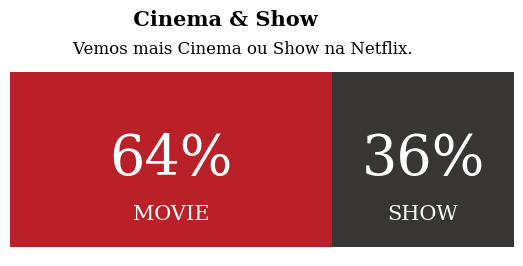

In [ ]:
x=titles.groupby(['type'])['type'].count()
y=len(titles)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['MOVIE'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['SHOW'], left=mf_ratio['MOVIE'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['MOVIE'][i]*100)}%", 
                   xy=(mf_ratio['MOVIE'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("MOVIE", 
                   xy=(mf_ratio['MOVIE'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['SHOW'][i]*100)}%", 
                   xy=(mf_ratio['MOVIE'][i]+mf_ratio['SHOW'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("SHOW", 
                   xy=(mf_ratio['MOVIE'][i]+mf_ratio['SHOW'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'                 Cinema & Show', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'            Vemos mais Cinema ou Show na Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Nuvens de Palavras baseado no campo Títulos

In [ ]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

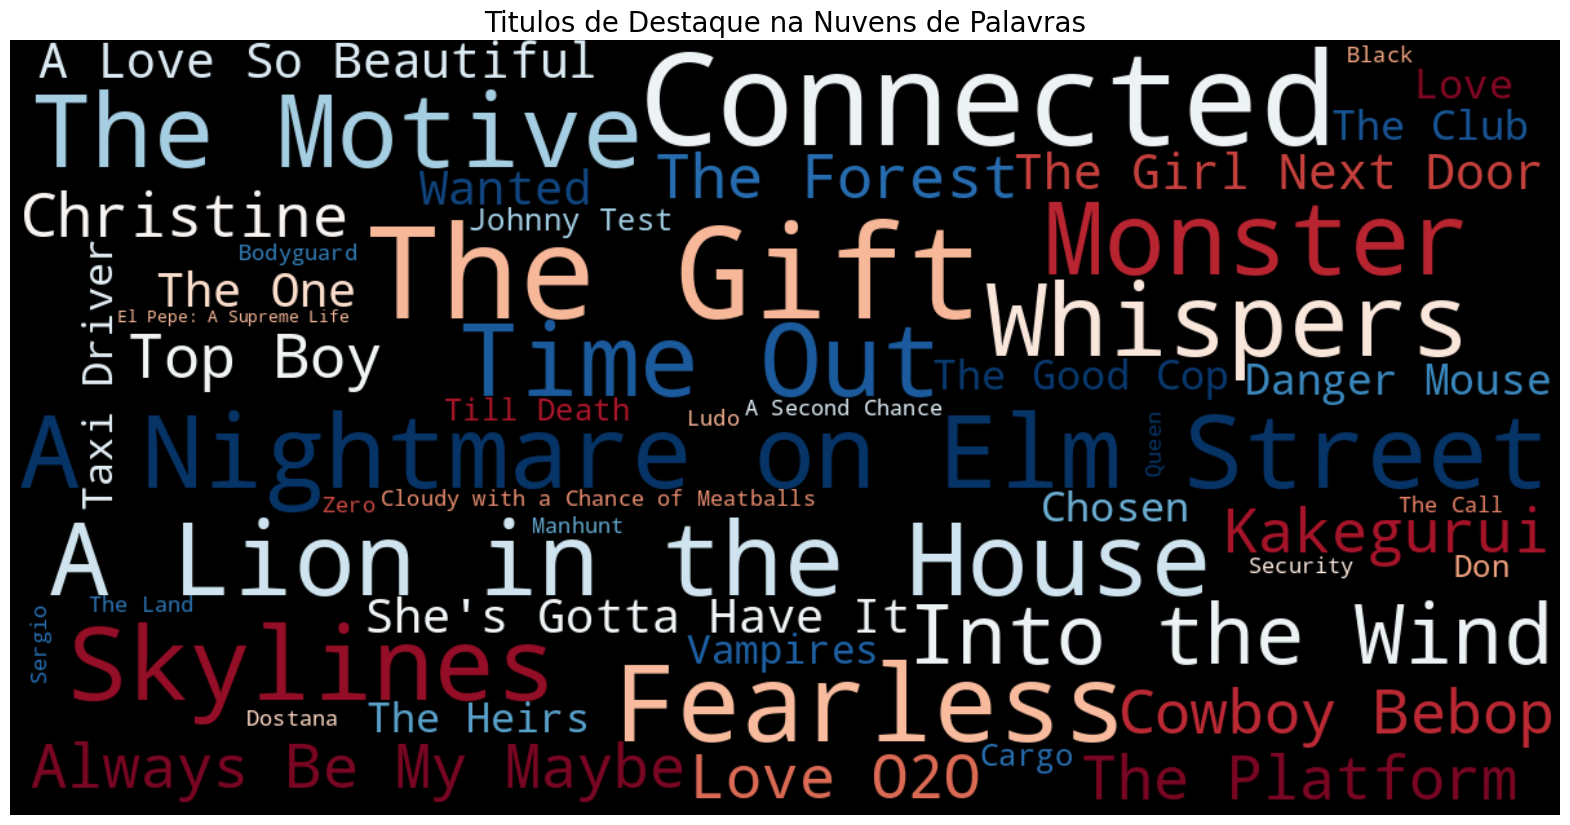

In [ ]:
freq_df = Freq_df(titles['title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'Titulos de Destaque na Nuvens de Palavras')

<a id="4.4"></a>
#### <b>4.4 <span style='color:#B21010'>|</span> Visualizações Multimodais

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Gênero por IMDB Score

In [ ]:
# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
from plotly.offline import init_notebook_mode, iplot

df.dropna()

#genres_imdb=titles.groupby('genres')[['imdb_score']].sum().reset_index()

grouped = df.groupby(['genres'])['imdb_score'].sum().reset_index()
print(grouped.head())

display(grouped)

genres_imdb=titles.groupby('genres')[['imdb_score']].sum().reset_index()

fig=px.bar(x=genres_imdb["genres"],
          y=genres_imdb["imdb_score"],
          color=genres_imdb["genres"],
          color_discrete_sequence=px.colors.sequential.Plasma,
          text=genres_imdb["imdb_score"],
          title= 'Ditribuição IBMD Score por Gênero',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="IMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()

          genres  imdb_score
0         action      2030.7
1      animation      1328.6
2         comedy      6723.8
3          crime      1954.3
4  documentation      3799.8


genres  imdb_score
0          action      2030.7
1       animation      1328.6
2          comedy      6723.8
3           crime      1954.3
4   documentation      3799.8
5           drama      7494.4
6        european       847.3
7          family      1175.6
8         fantasy       862.3
9         history       543.3
10         horror       642.0
11          music       607.5
12        reality       896.4
13        romance      2065.6
14          scifi       907.4
15          sport       426.0
16       thriller      2184.4
17            war       295.8
18        western       121.6

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Genres e TMDB_Score

In [ ]:

grouped = df.groupby(['genres'])['tmdb_score'].sum().reset_index()
print(grouped.head())

display(grouped)

genres_tmdb=titles.groupby('genres')[['tmdb_score']].sum().reset_index()

fig=px.bar(x=genres_tmdb["genres"],
           y=genres_tmdb["tmdb_score"],
          color=genres_tmdb["genres"],
          color_discrete_sequence=px.colors.sequential.Plasma,
          text=genres_tmdb["tmdb_score"],
          title= 'Ditribuição TBMD Score por Gênero',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="TMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()



          genres  tmdb_score
0         action    2252.360
1      animation    1523.438
2         comedy    7219.132
3          crime    2054.419
4  documentation    4122.106


genres  tmdb_score
0          action    2252.360
1       animation    1523.438
2          comedy    7219.132
3           crime    2054.419
4   documentation    4122.106
5           drama    7813.926
6        european     868.606
7          family    1399.577
8         fantasy     955.591
9         history     542.894
10         horror     708.617
11          music     650.731
12        reality    1041.800
13        romance    2165.153
14          scifi    1048.206
15          sport     454.514
16       thriller    2339.956
17            war     318.294
18        western     121.679

<ipython-input-220-9b19476f497a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



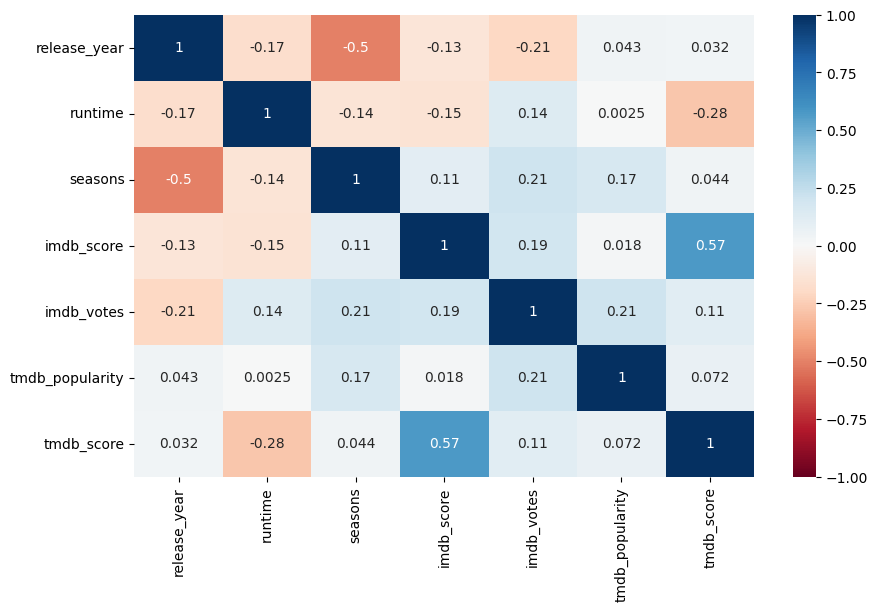

In [ ]:
# Matriz de Correlação com Seaborn titles
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

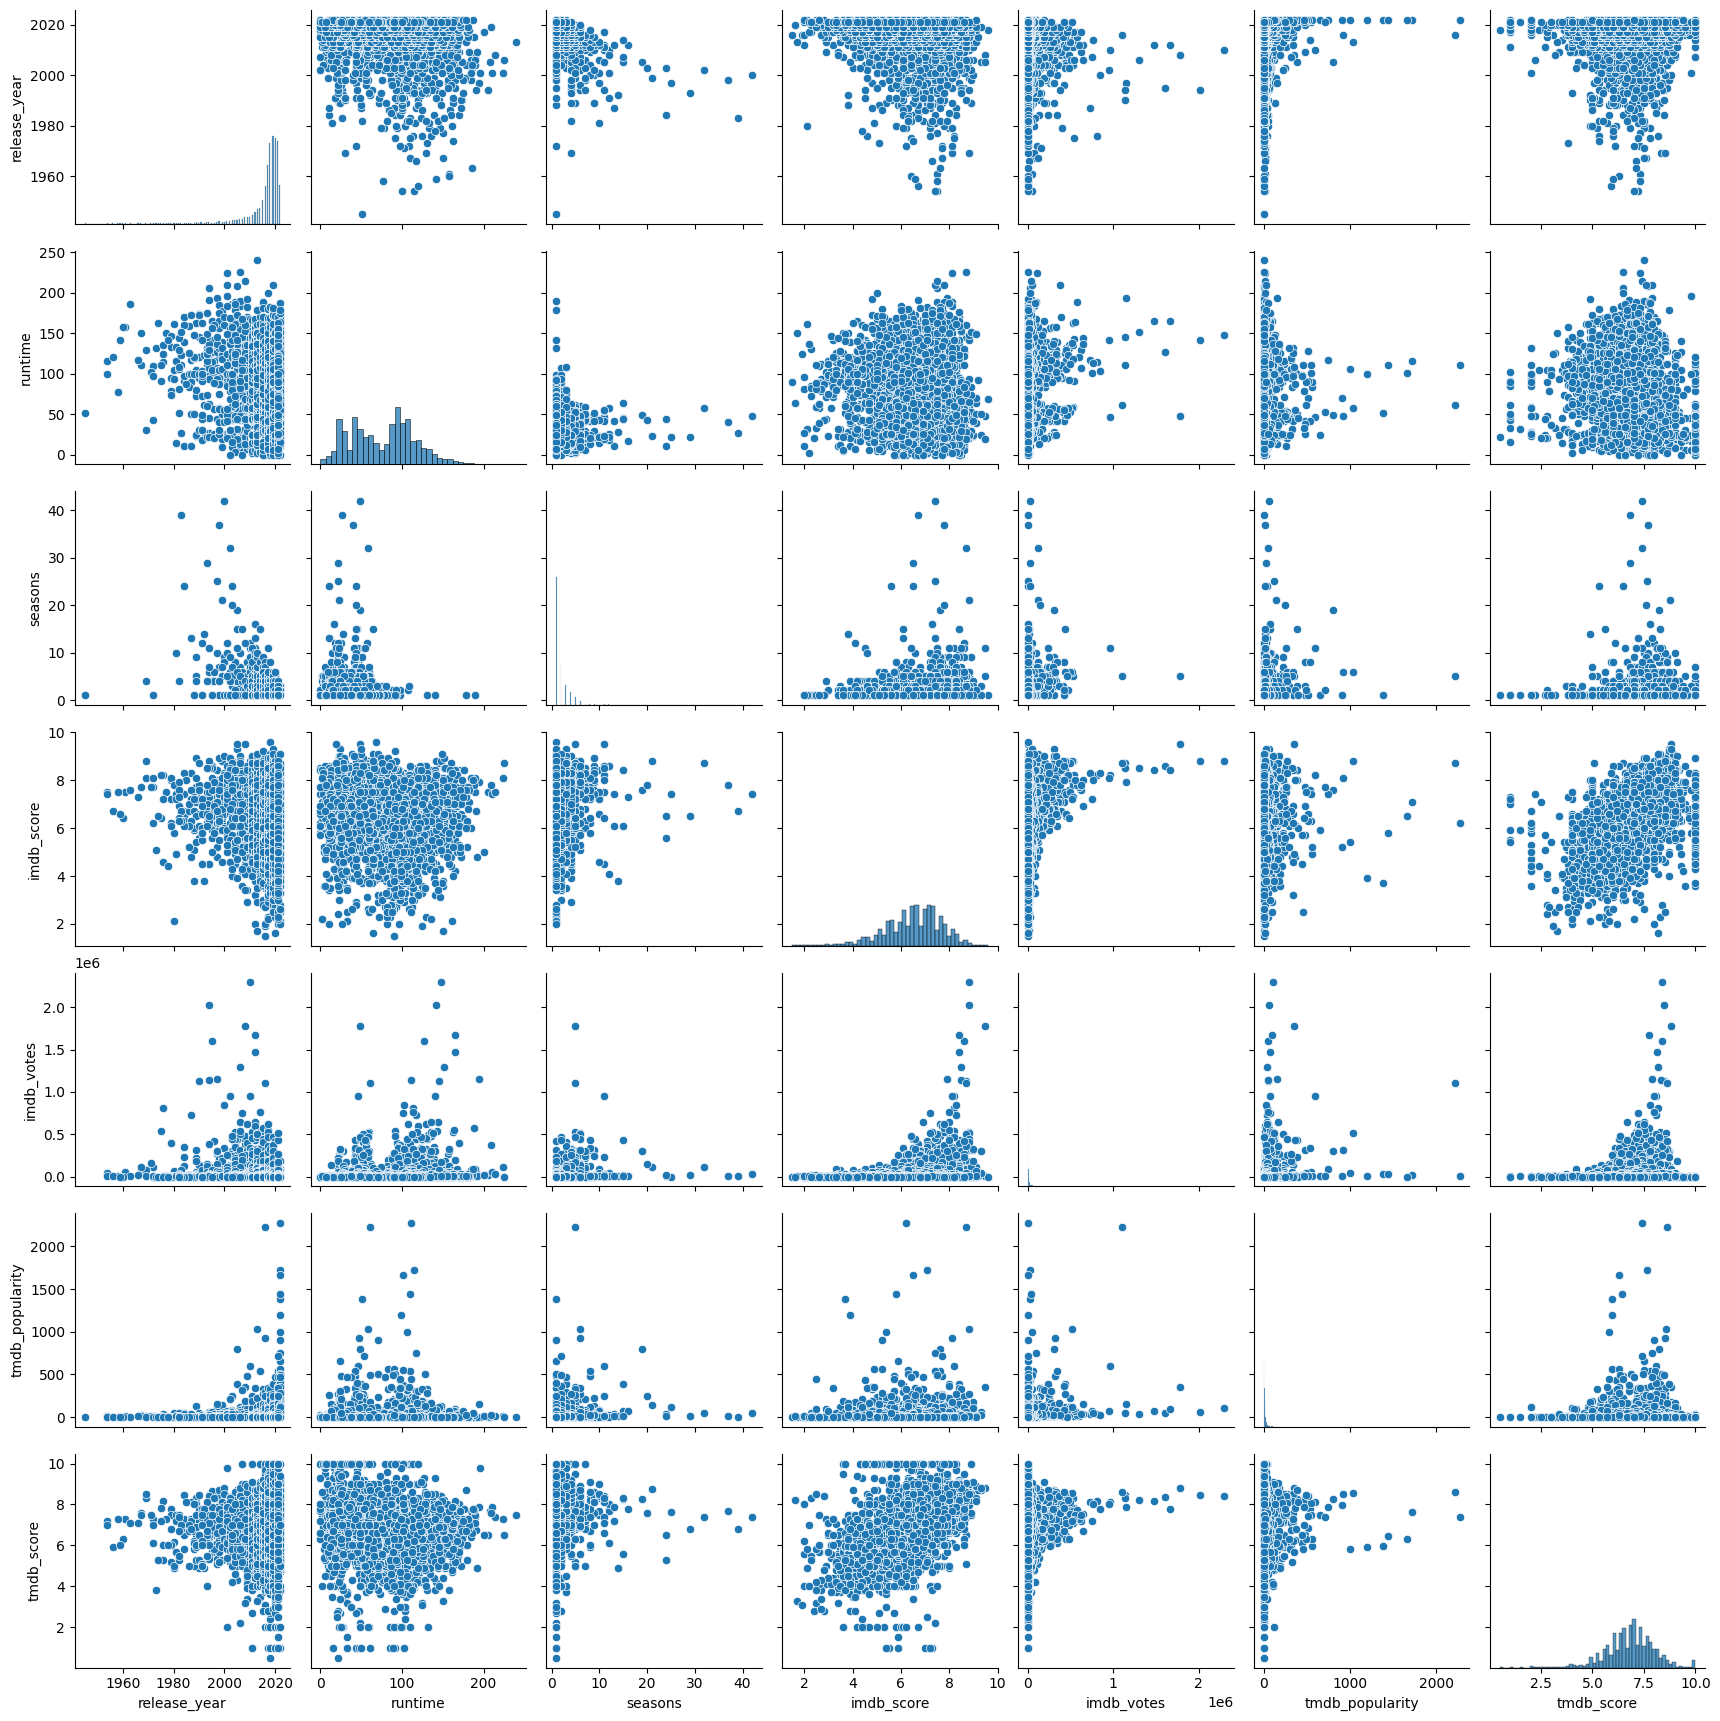

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(titles)

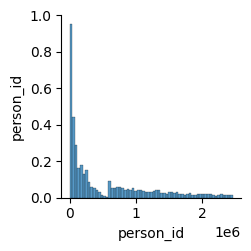

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(credits)

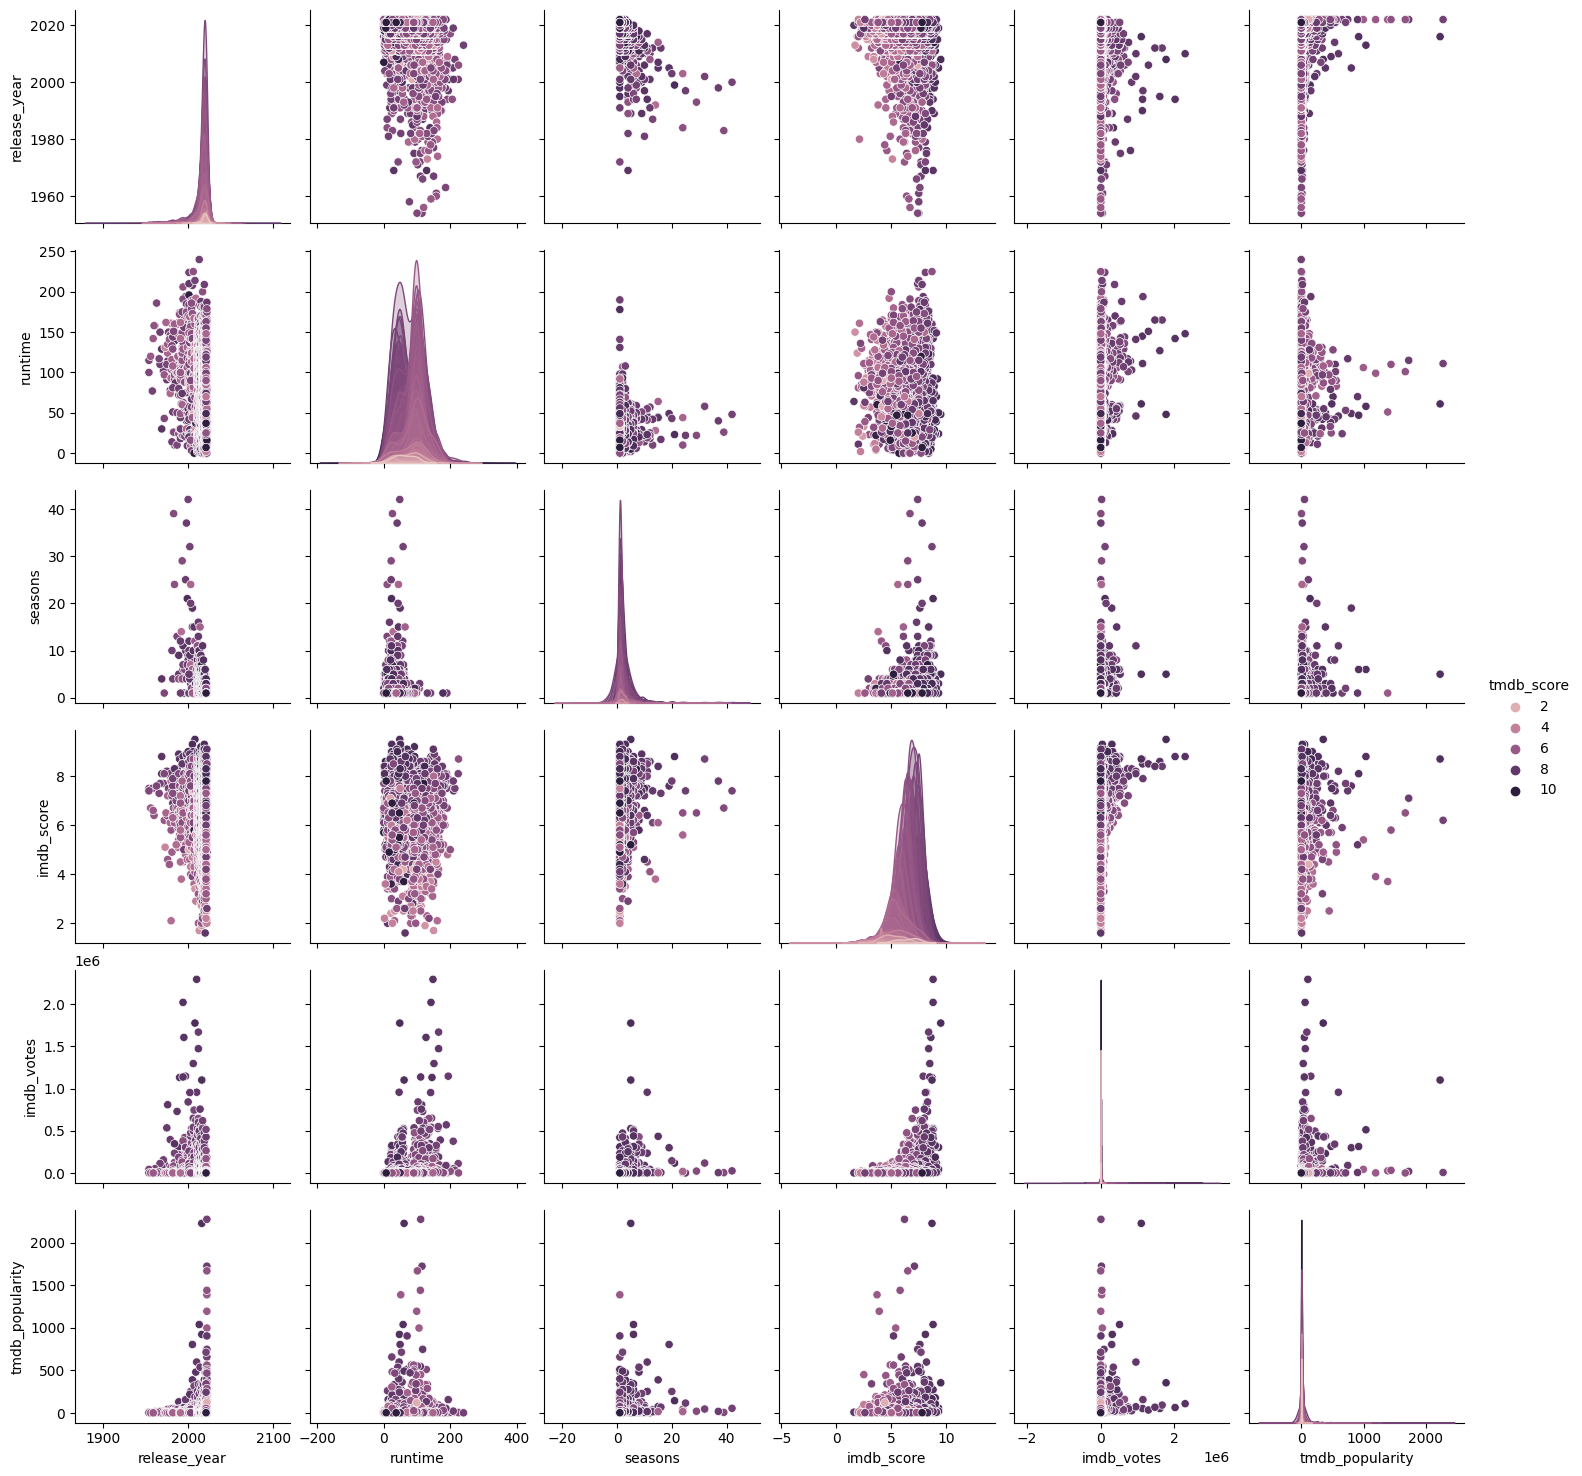

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(titles, hue = "tmdb_score", height = 2.5);

<a id="6.1"></a>
#### <b>6.1 <span style='color:#B21010'>|</span> Análise Univariada

<a id="4.5"></a>
#### <b>4.5 <span style='color:#B21010'>|</span>  Outras informações úteis sobre Dataset

In [ ]:
print("Forma do dataset: ", credits.shape)
print("_______________________________________")
print("Número de valores nulos: ")
print(credits.isnull().sum())
print("_______________________________________")
print("Número de valores únicos: ")
print(credits.nunique())


Forma do dataset:  (77801, 5)
_______________________________________
Número de valores nulos: 
person_id       0
id              0
name            0
character    9772
role            0
dtype: int64
_______________________________________
Número de valores únicos: 
person_id    54589
id            5489
name         54314
character    47274
role             2
dtype: int64


In [ ]:
print("Forma do dataset: ", titles.shape)
print("_______________________________________")
print("Número de valores nulos: ")
print(titles.isnull().sum())
print("_______________________________________")
print("Número de valores únicos: ")
print(titles.nunique())

Forma do dataset:  (5850, 15)
_______________________________________
Número de valores nulos: 
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                    59
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64
_______________________________________
Número de valores únicos: 
id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                    19
production_countries      89
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popular

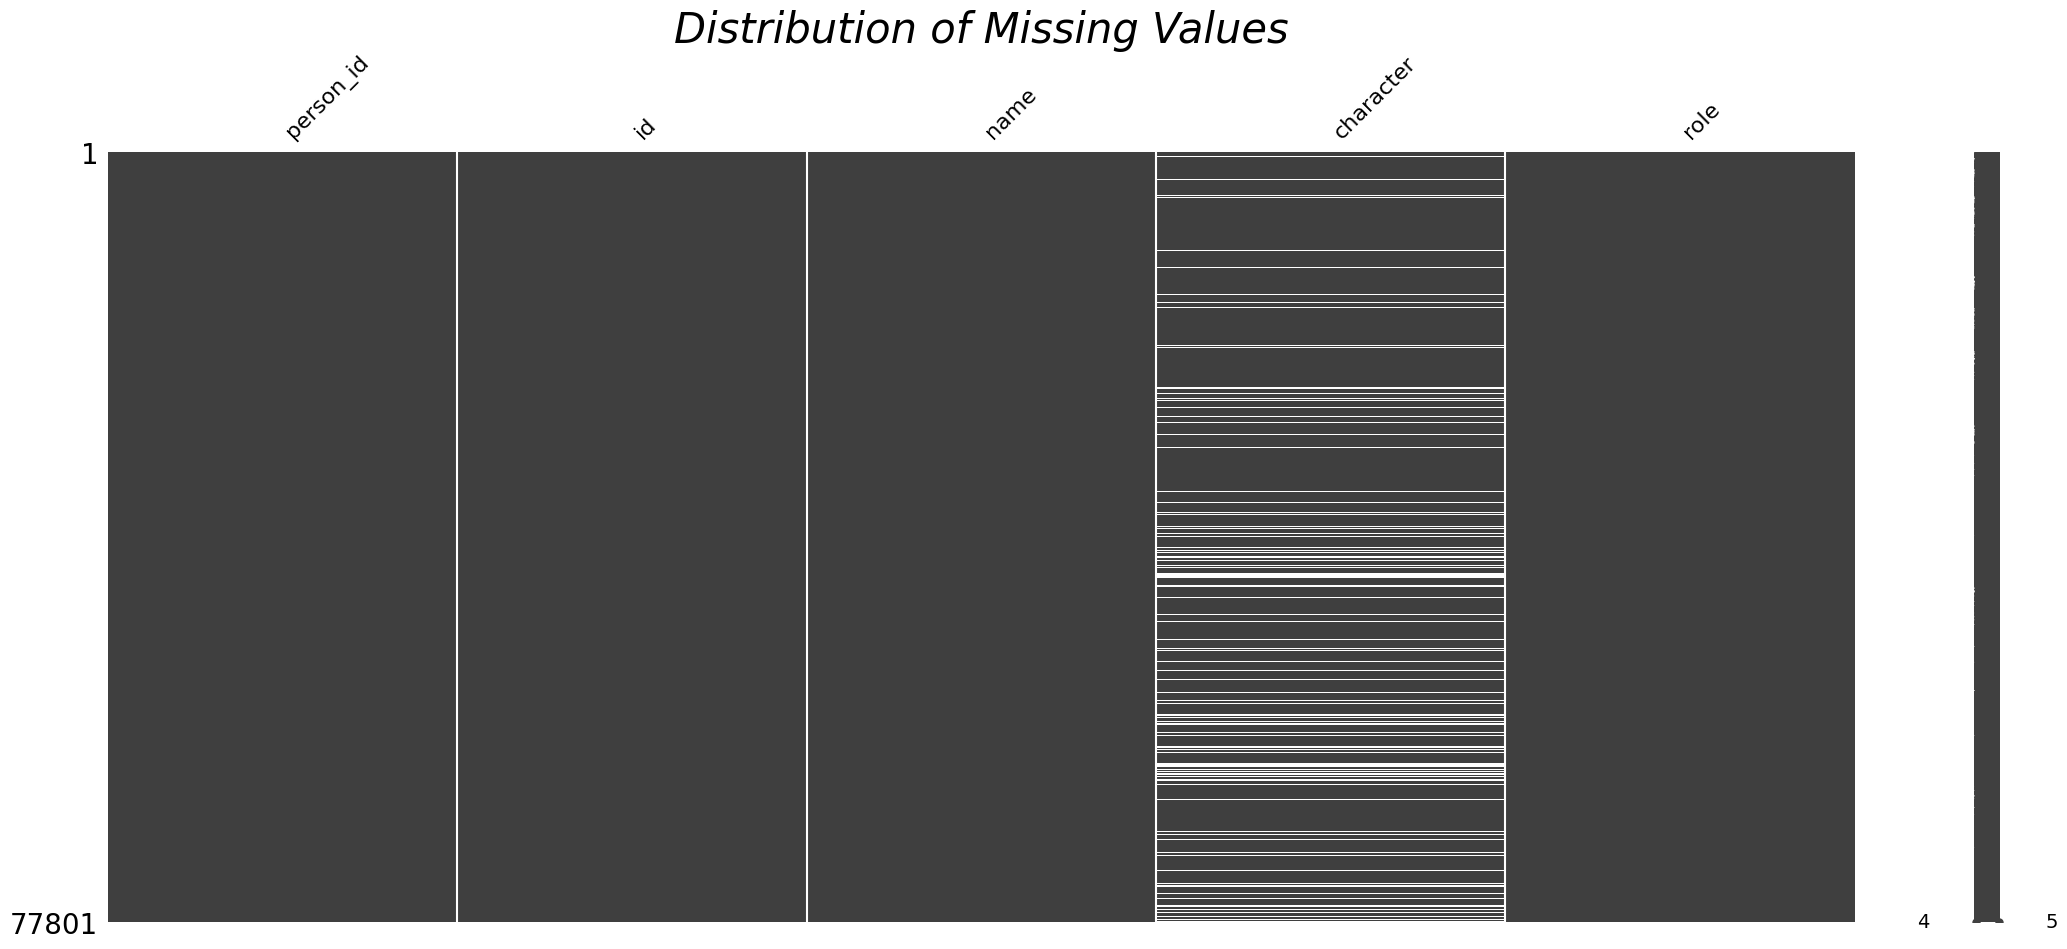

In [ ]:
msno.matrix(credits)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4.6"></a>
## <b><span style='color:#B21010'> ||</span> Na matriz acima, percebemos visualmente que as variáveis que character_name possuem linhas brancas, logo possuem dados faltantes. 

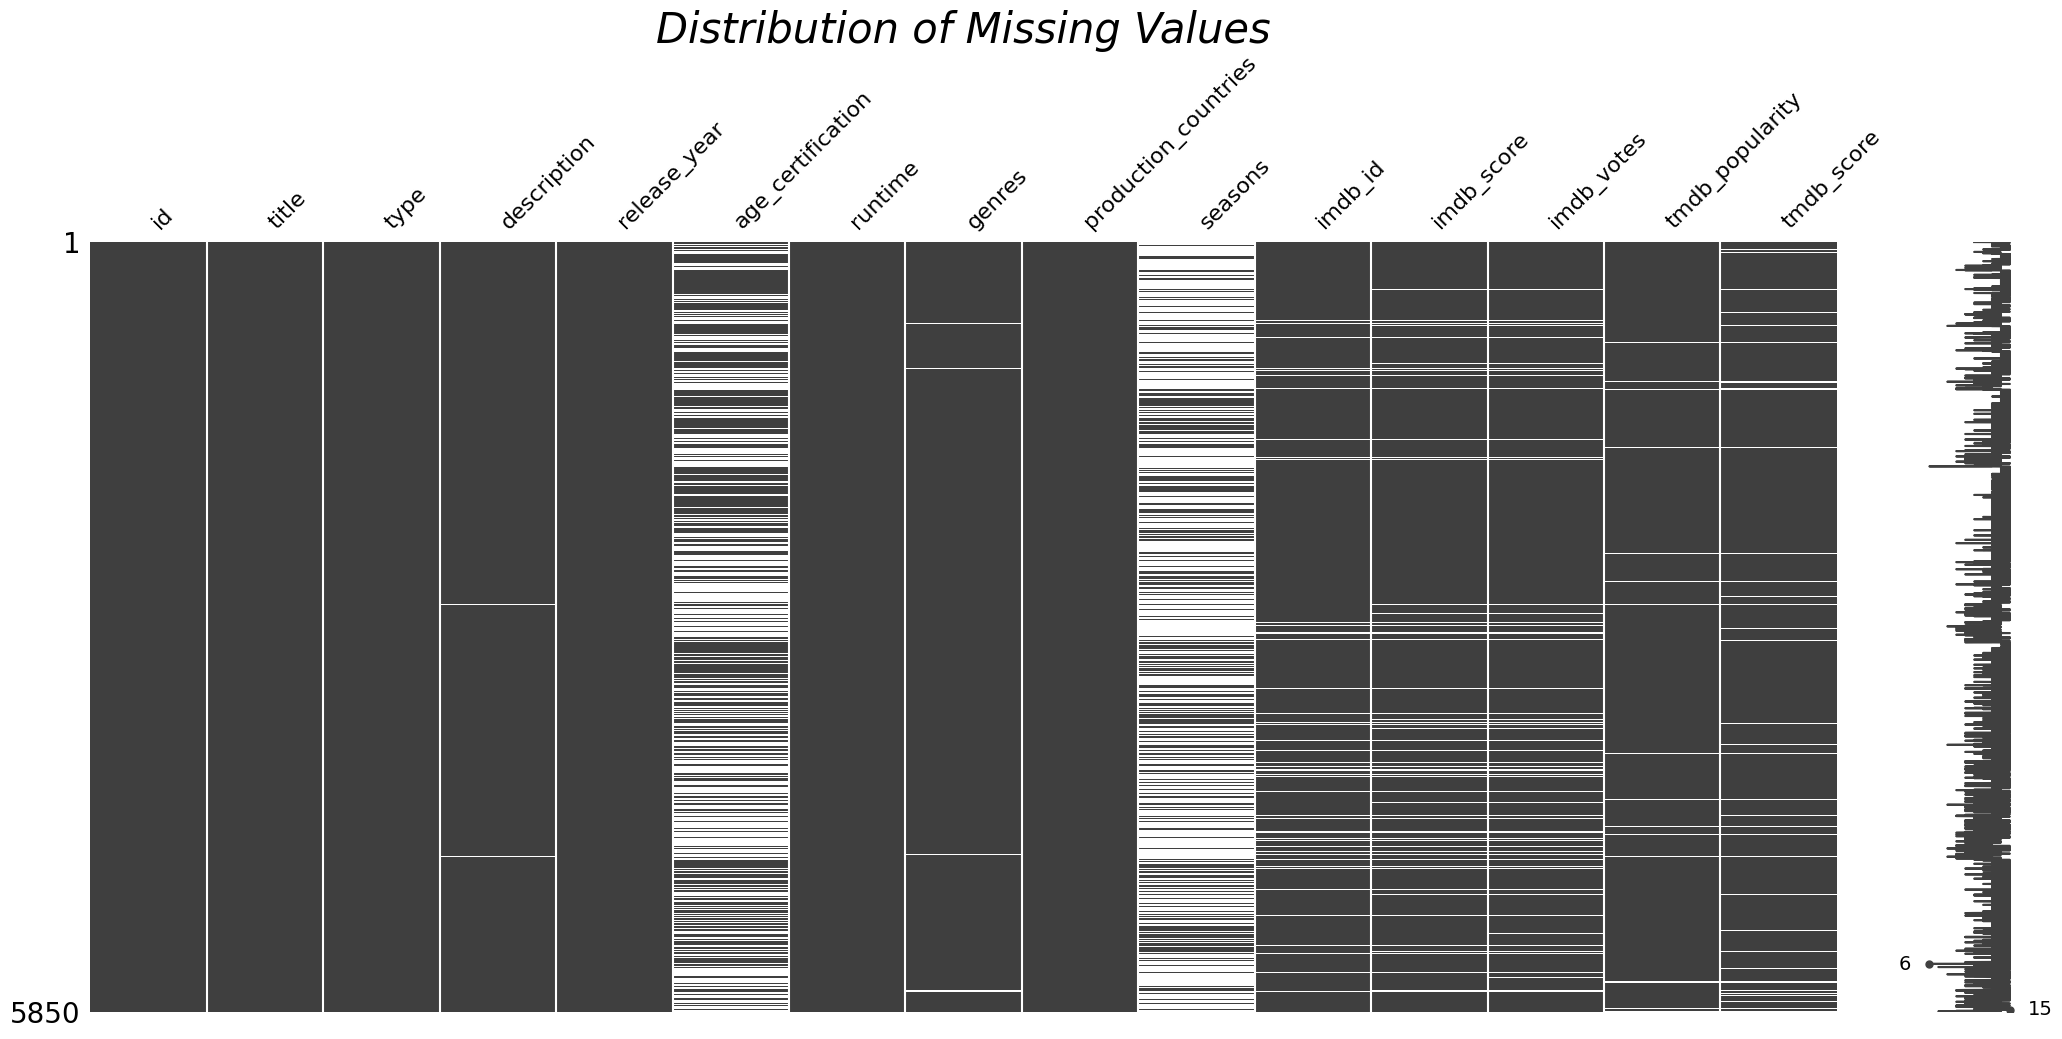

In [ ]:
msno.matrix(titles)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4.7"></a>
## <b><span style='color:#B21010'> ||</span> Na matriz acima, percebemos visualmente que as variáveis age_certification, seasons, imdb_id, imdb_score, imdb_votes,tmdb_popularity e tmdb_score possuem linhas brancas, logo possuem dados faltantes. Além disso, como seasons possui mais linhas brancas, ele possui mais dados nulos.

<a id="4.8"></a>
#### <b>4.6 <span style='color:#B21010'>|</span> Correlação entre os Atributos

In [ ]:
corr=credits.corr()
corr.style.background_gradient(cmap='Reds')

<ipython-input-230-123da6652909>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
corr=titles.corr()
corr.style.background_gradient(cmap='Reds')

<ipython-input-231-5a5322b7081a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<a id="4.99"></a>
#### <b>4.7 <span style='color:#B21010'>   Análise Multilateral <a id="4.8"> 

In [ ]:
genres_tmdbp=titles.groupby('genres')[['tmdb_popularity']].sum().reset_index()

In [ ]:
fig=px.bar(x=genres_tmdbp["genres"],
          y=genres_tmdbp["tmdb_popularity"],
          color=genres_tmdbp["genres"],
          color_discrete_sequence=px.colors.sequential.BuGn,
          text=genres_tmdbp["tmdb_popularity"],
          title= 'Distribution Generi por Popularidade',
          template= 'plotly_dark')

fig.update_layout(xaxis_title="Genres",
                 yaxis_title="TMDB Score",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Distribuição de Ano release e IMBB popularidade por tipo

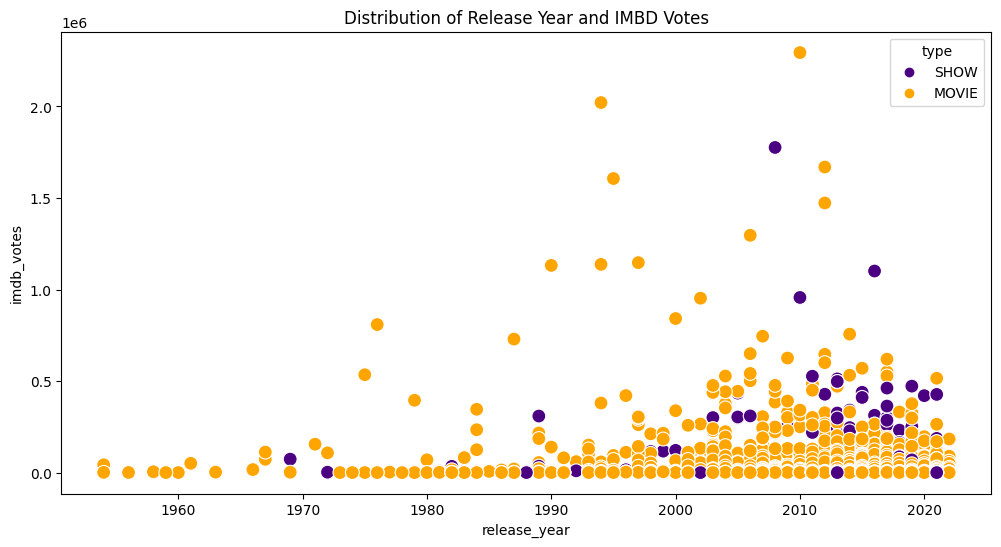

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Release Year and IMBD Votes')

sns.scatterplot(x=titles.release_year,
                y=titles.imdb_votes,
                hue=titles.type,
                palette=['indigo','orange'],
                s=100);

<h2 style="color:#034914 ;font-size: 1em "><b>🔎 Distribuição do Ano da Release e TMDB Populariedade por Tipo

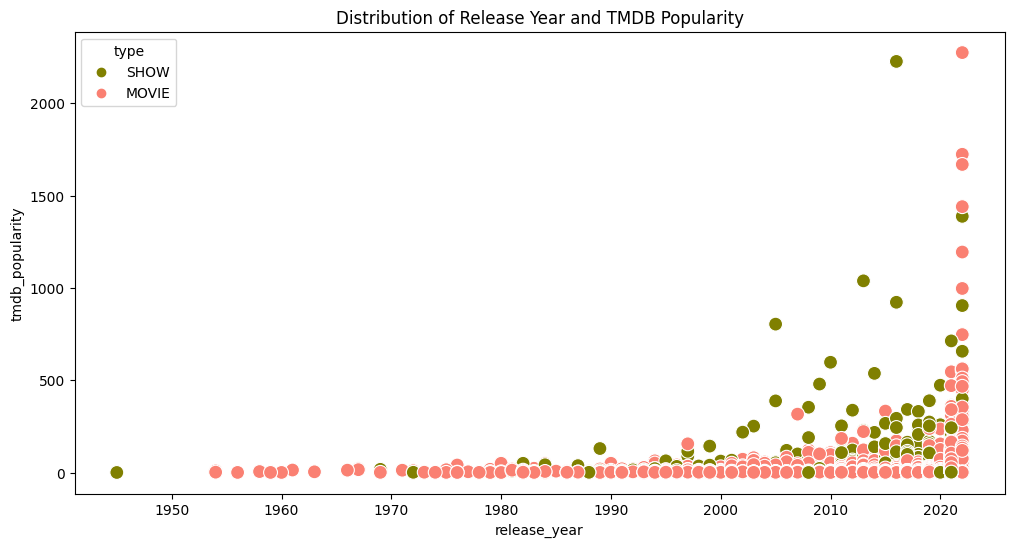

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Release Year and TMDB Popularity')

sns.scatterplot(x=titles.release_year,
                y=titles.tmdb_popularity,
                hue=titles.type,
                palette=['olive','salmon'],
                s=100);

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>                    Fim!     </b></marquee>

<h2 style="color:#034914 ;font-size: 1em "><b>🔎  Pandas Profiling

In [ ]:
# Instalando o pandas profiling (executar apenas na 1a vez, depois comente esta linha)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# geração do report
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

# exportação do report
profile.to_file(output_file="Report-Netflix.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]